# Confidence Intervals

In interval estimation, our focus lies in creating a range or interval that probably contains the unknown parameter of the population.

### Normally distributed population - $\mu$ unknown

Assuming i.i.d. sampling and confidence level of 95% ($\alpha=0.05$)

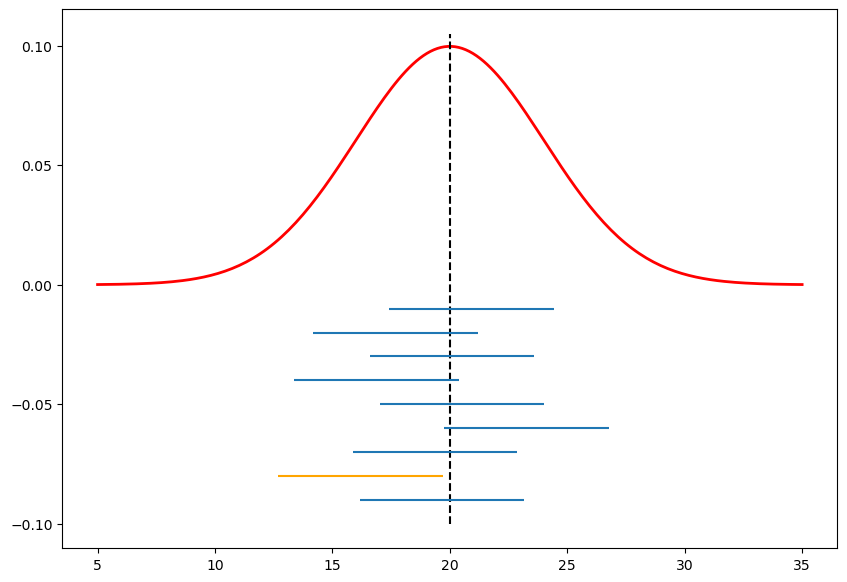

In [25]:
import numpy as np
import matplotlib.pyplot as plt

n = 5 # sample size
N = 10 # Number of samples
z_a2 = 1.96

mu, sigma = 20, 4
x = np.linspace(5, 35, 200)
gaussian_pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Draw the unknown distribution
plt.figure(figsize=(10, 7))
plt.plot(x, gaussian_pdf, linewidth=2, color='r')

plt.vlines(20, -0.1, 0.105, color='black', linestyles='dashed')

# Draw some condifidence interval
for i in range(1, N):
    sample_mean = np.mean(np.random.normal(mu, sigma, n))
    lcl = sample_mean - z_a2 * sigma / (np.sqrt(n))
    ucl = sample_mean + z_a2 * sigma / (np.sqrt(n))
    if lcl > mu or ucl < mu:
        plt.hlines(-i/100, lcl, ucl, color='orange')
    else:
        plt.hlines(-i/100, lcl, ucl)
    
plt.show()

In [40]:
def conf_intervals_containing_real_param(mu, sigma, sample_size=5, iterations=1000):
    counter = 0
    for _ in range(iterations):
        sample_mean = np.mean(np.random.normal(mu, sigma, sample_size))
        lcl = sample_mean - z_a2 * sigma / (np.sqrt(sample_size))
        ucl = sample_mean + z_a2 * sigma / (np.sqrt(sample_size))
        if lcl <= mu <= ucl:
            counter += 1
    return counter

In [51]:
ITERATIONS = 1000

good_intervals = conf_intervals_containing_real_param(mu, sigma, sample_size=5, iterations=ITERATIONS)

print(f"Confidence interval containing real unknown parameter: {good_intervals/ITERATIONS*100:.2f}%")

Confidence interval containing real unknown parameter: 95.50%
